In [1]:
import wasaga_tools
import flopy
import shutil
from pathlib import Path

import importlib
importlib.reload(wasaga_tools)

<module 'wasaga_tools' from 'c:\\Users\\swan47\\Documents\\GitHub\\wasaga_model\\wasaga_tools.py'>

# SRP

In [2]:
################### Model Parameters   ##############################
my_params = {}
my_params['name'] = 'test_wasaga_2'
## mt3dGcg
cclose=my_params['cclose'] = 1e-5
## RCT

my_params['hk'] = 6.9
my_params['vk'] = 0.69

my_params['porosity'] = 0.35
my_params['sy'] = 0.33
my_params['ss'] = 0.0002
my_params['la'] = 0.2
my_params['trpt'] = 0.1
my_params['trpv'] = 0.1
my_params['dmcoef'] = 3.7E-10 ####
my_params['sconc'] = 20

#Species ID
sp_ID = {}
#sp_ID['Cl-'] = 1
sp_ID['SRP'] = 1
my_params['sp_ID'] = sp_ID

#Species Name
sp_name = {}
#sp_name[1] = 'Cl-'
sp_name[1] = 'SRP'
my_params['sp_name'] = sp_name


## P lens
my_params['perlen'] = [1]+[30,92,31,212]*25 +[365]*5+[365*5]*5+[365*4]+[185,30,30,120]


## Wel data
wel_data = {}
#last_wel_id = len(my_params['perlen'])-1
for y in range(25):
    p = (y)*4 +2
    wel_data[p] = [[50,0,15,0.0075]]
    p += 1
    wel_data[p] = [[50,0,15,0.075]]
    p += 1
    wel_data[p] = [[50,0,15,0.0075]]
    p += 1
    wel_data[p] = [[50,0,15,0.0]]
    p += 1

wel_data[p] = [[50,0,15,0]]
my_params['wel_data'] = wel_data


# Mt3dSsm 
ssm_data = {}
itype = flopy.mt3d.Mt3dSsm.itype_dict()

for y in range(25):
    p = (y)*4 +2
    ssm_data[p] = [(50, 0, 15, 3000.0, itype['WEL'])]
    p += 1
    ssm_data[p] = [(50, 0, 15, 3000.0, itype['WEL'])]
    p += 1
    ssm_data[p] = [(50, 0, 15, 3000.0, itype['WEL'])]
    p += 1
    ssm_data[p] = [(50, 0, 15, 3000.0, itype['WEL'])]
    p += 1
ssm_data[p] = [(50, 0, 15, 0.0, itype['WEL'])]
my_params['ssm_data'] = ssm_data


#Mt3dBtn
mixelm=my_params['mixelm'] = 0 # HMOC
my_params['isothm'] = 3 # Langmuir
my_params['sp1'] = 0.0001 ##  0.1 mg/L  => 1e5 ug/m3
my_params['sp2'] = 0.0001  ##  maximum soil adsorption value = 100 ug/g => 1e5 ug/kg

# Rch
my_params['rech'] = 0.5/365 #0.5/365 ## 500mm/year

# dt0
my_params['dt0'] = 0.1
################################################################

found 'rch' in modflow model, resetting crch to 0.0
FloPy is using the following executable to run the model: C:\Users\swan47\AppData\Local\flopy\bin\swtv4.EXE

                                  SEAWAT Version 4
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 4.00.05 10/19/2012                      

Incorporated MODFLOW Version: 1.18.01 06/20/2008                      
Incorporated MT3DMS  Version: 5.20    10/30/2006                      


 This program is public domain and is released on the
 condition that neither the U.S. Geological Survey nor
 the United States Government may be held liable for any
 damages resulting from their authorized or unauthorized
 use.


 Using NAME file: wasaga.nam                                                                                                                                                                                              
 Run start date and time (yyyy/mm/dd h

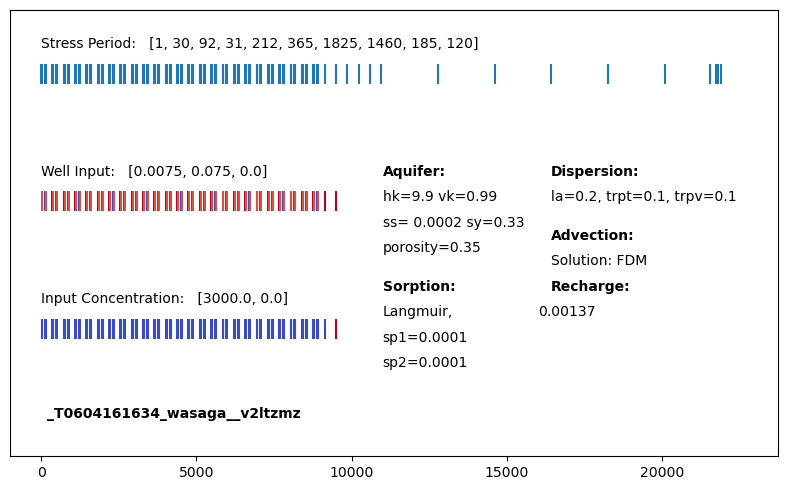

In [3]:
ws = wasaga_tools.run_wasaga(my_params=my_params)
shutil.copy('wasaga_draw.py',Path(ws) / 'wasaga_draw.py')
wasaga_tools.execute_wasaga_draw(ws = ws)

In [12]:
%%capture
for h in [1.0]:
    for sp1 in [0.0001]:
        my_params['hk'] = h
        my_params['vk'] = h/10
        my_params['sp1'] = sp1
        ws = wasaga_tools.run_wasaga(my_params=my_params)
        shutil.copy('wasaga_draw.py',Path(ws) / 'wasaga_draw.py')
        wasaga_tools.execute_wasaga_draw(ws = ws)

In [ ]:
%% capture
for h in [6.9]:
    my_params['hk'] = h
    my_params['vk'] = h/10
    for kd in [0.012]:
        my_params['sp1'] = kd
        #my_params['name'] = 'Linear_hk{:02d}_kd{:03d}'.format(int(h),int(kd*1000))
        for rech in [0,0.5/365,1.5/365]:
            my_params['rech'] = rech
            my_params['name'] = 'Linear_hk{:02d}_rech{:03d}'.format(int(h),int(rech*1000))

            ws = wasaga_tools.run_wasaga(my_params=my_params)

            shutil.copy('wasaga_draw.py',Path(ws) / 'wasaga_draw.py')
            wasaga_tools.execute_wasaga_draw(ws = ws)

# Cl-

In [6]:
################### Model Parameters   ##############################
my_params = {}
my_params['name'] = 'test_wasaga_cl'
## mt3dGcg
cclose=my_params['cclose'] = 1e-5
## RCT

my_params['hk'] = 12.9
my_params['vk'] = 1.29

my_params['porosity'] = 0.35
my_params['sy'] = 0.33
my_params['ss'] = 0.0002
my_params['la'] = 0.2
my_params['trpt'] = 0.1
my_params['trpv'] = 0.1
my_params['dmcoef'] = 3.7E-10 ####
my_params['sconc'] = 0

#Species ID
sp_ID = {}
#sp_ID['Cl-'] = 1
sp_ID['Cl'] = 1
my_params['sp_ID'] = sp_ID

#Species Name
sp_name = {}
#sp_name[1] = 'Cl-'
sp_name[1] = 'Cl'
my_params['sp_name'] = sp_name


## P lens
my_params['perlen'] = [1,1]+[90,90,90,90]


## Wel data
wel_data = {}
#last_wel_id = len(my_params['perlen'])-1
for y in range(25):
    p = 1
    wel_data[p] = [[50,0,15,1.5]]

    p += 1

wel_data[p] = [[50,0,15,0]]
my_params['wel_data'] = wel_data


# Mt3dSsm 
ssm_data = {}
itype = flopy.mt3d.Mt3dSsm.itype_dict()

for y in range(25):
    p = 1
    ssm_data[p] = [(50, 0, 15, 500.0, itype['WEL'])]

    p += 1
ssm_data[p] = [(50, 0, 15, 0.0, itype['WEL'])]
my_params['ssm_data'] = ssm_data


#Mt3dBtn
mixelm=my_params['mixelm'] = 3 # HMOC
my_params['isothm'] = 0 #No Sorption
my_params['sp1'] = 0.0001 ##  0.1 mg/L  => 1e5 ug/m3
my_params['sp2'] = 0.0001  ##  maximum soil adsorption value = 100 ug/g => 1e5 ug/kg

# Rch

my_params['rech'] = 0 ## 500mm/year


# dt0 

my_params['dt0'] = 0.0
################################################################

/var/folders/hy/v14_l_r91tl2w5s9xfm9p2kc0000gn/T/_T0530203351_wasaga_1v5dnq0j
found 'rch' in modflow model, resetting crch to 0.0
FloPy is using the following executable to run the model: /Users/b/.local/share/flopy/bin/swtv4

                                  SEAWAT Version 4
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 4.00.05 10/19/2012                      

Incorporated MODFLOW Version: 1.18.01 06/20/2008                      
Incorporated MT3DMS  Version: 5.20    10/30/2006                      


 This program is public domain and is released on the
 condition that neither the U.S. Geological Survey nor
 the United States Government may be held liable for any
 damages resulting from their authorized or unauthorized
 use.


 Using NAME file: wasaga.nam                                                                                                                                                                   

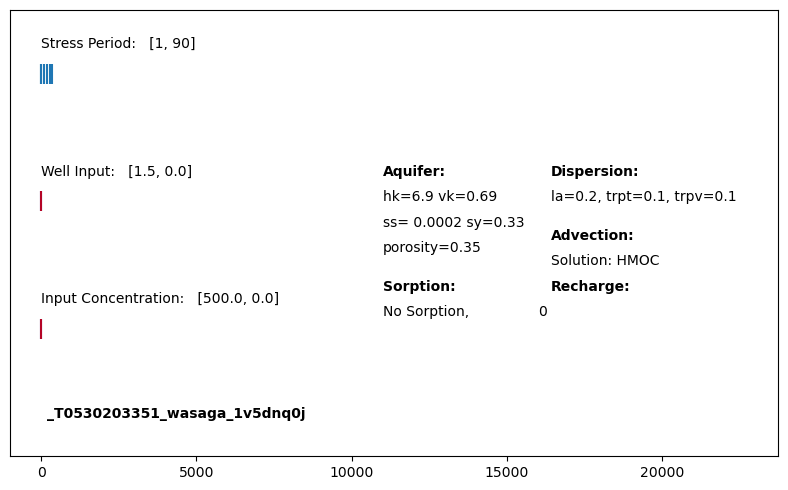

In [7]:
for h in [6.9]:
    my_params['hk'] = h
    my_params['vk'] = h/10

    ws = wasaga_tools.run_wasaga(my_params=my_params)

    shutil.copy('wasaga_draw.py',Path(ws) / 'wasaga_draw.py')
    wasaga_tools.execute_wasaga_draw(ws = ws)

In [8]:
import requests

In [9]:
response = requests.get("https://api.qa.datastream.org/v1/odata/v4")

In [10]:
print(response.status_code)

404
